In [1]:
import torch
from torch import nn
from torch import optim
from matplotlib import pyplot as plt
import utils
import importlib

import numpy as np
import seaborn as sns
sns.set()

In [2]:
plt.rcParams["figure.figsize"] = (14.0, 7.0)

In [90]:
importlib.reload(utils)
swarm_sim = utils.Swarm_Simulator()
swarm_sim.params['swarm_size'] = 15

In [ ]:
for my_width in [5,10]:
    for my_depth in [1,2]:
        for my_func in ['exponential', 'sinusoidal']:
            swarm_sim.params['width'] = my_width
            swarm_sim.params['hidden'] = my_depth
            swarm_sim.params['function'] = my_func
            swarm_sim.rebuild_predictor()
            swarm_sim.run_sim()

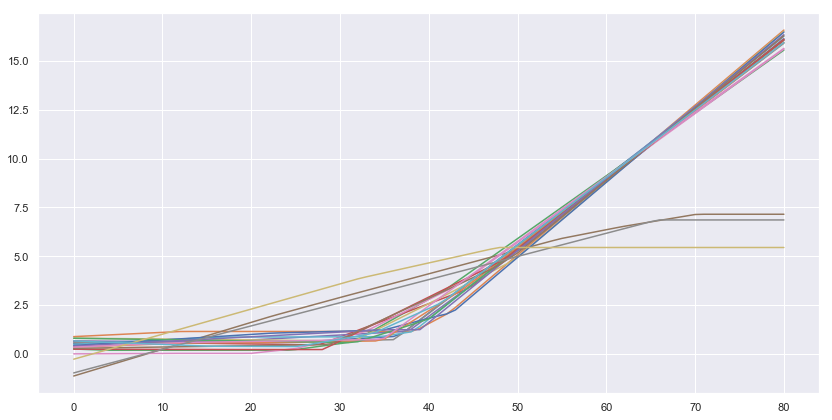

In [68]:
plt.plot
for i in range(len(swarm_sim.bees)):
    plt.plot(swarm_sim.bees[i]['pred_list'][-1])

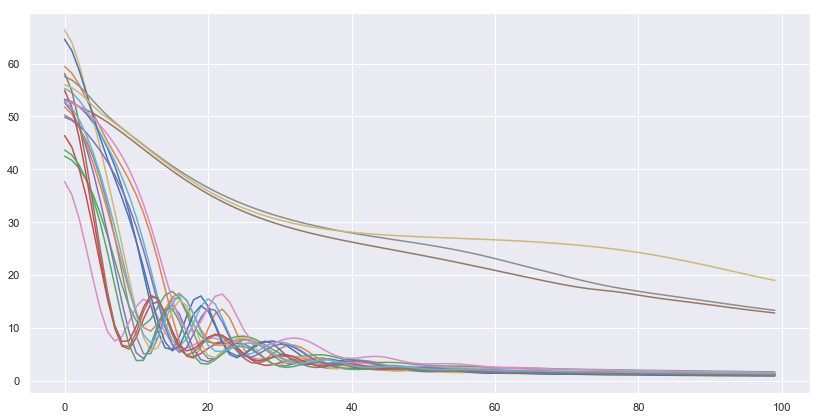

In [67]:
for i in range(len(swarm_sim.bees)):
    plt.plot(swarm_sim.bees[i]['loss_list'])

In [72]:
np.mean([1,2,3])

2.0